In [252]:
conda install tensorflow

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /opt/homebrew/anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |  py310hca03da5_0         433 KB
    conda-23.3.0               |  py310hca03da5_0         962 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  boltons            pkgs/main/osx-arm64::boltons-23.0.0-py310hca03da5_0 

The following packages will be UPDATED:

  conda                              23.1.0-py310hca03da5_0 --> 23.3.0-py310hca03da5_0 



conda-23.3.0         | 962 KB    |                                       |   0% 
conda-23.3.0         | 962 KB    | #########################8            |  70% 


In [253]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [254]:
data = pd.read_csv('cpu_memory_usage_v1.csv', header=0)
data

,name,tags,time,pod_name,namespace,cpu_usage_nanocores,memory_working_set_bytes
0,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-wklkm,drive,96624523,1337585664
1,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-lpr67,drive,89770983,1361653760
2,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-sgr2x,drive,77112631,1285890048
3,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-2wdsh,drive,35692946,1254232064
4,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-chm2j,drive,93409866,1294434304
...,...,...,...,...,...,...,...
231630,kubernetes_pod_container,NaN,1679071890000000000,drive-az2-prd-69cbb999bc-wklkm,drive,12293800,1313955840
231631,kubernetes_pod_container,NaN,1679071890000000000,drive-az2-prd-69cbb999bc-sgr2x,drive,9217571,1338773504
231632,kubernetes_pod_container,NaN,1679071890000000000,drive-az2-prd-69cbb999bc-h8hqh,drive,13224852,1415725056
231633,kubernetes_pod_container,NaN,1679071890000000000,drive-az2-prd-69cbb999bc-b8k2z,drive,18092365,1453850624


In [255]:
data['time'] = pd.to_datetime(data['time'], unit='ns')
data = data.loc[data.pod_name == 'drive-az2-prd-69cbb999bc-lpr67']
date_time = pd.to_datetime(data['time'], format='%Y-%M-%D %H:%M:%S')

In [261]:
data = data.loc[:,['cpu_usage_nanocores', 'memory_working_set_bytes']]
X = data.loc[:,['cpu_usage_nanocores']]
Y = data.loc[:,['memory_working_set_bytes']]

In [262]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y) 

X_train = X_ss[:15000, :]
X_test = X_ss[15000:, :]

y_train = y_ms[:15000, :]
y_test = y_ms[15000:, :] 


print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (15000, 1) (15000, 1)
Testing Shape (4304, 1) (4304, 1)


In [265]:

X_train_tensors_f = tf.reshape(X_train,   (X_train.shape[0], 1, X_train.shape[1]))
X_test_tensors_f = tf.reshape(X_test,  (X_test.shape[0], 1, X_test.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test.shape) 

Training Shape (15000, 1, 1) (15000, 1)
Testing Shape (4304, 1, 1) (4304, 1)


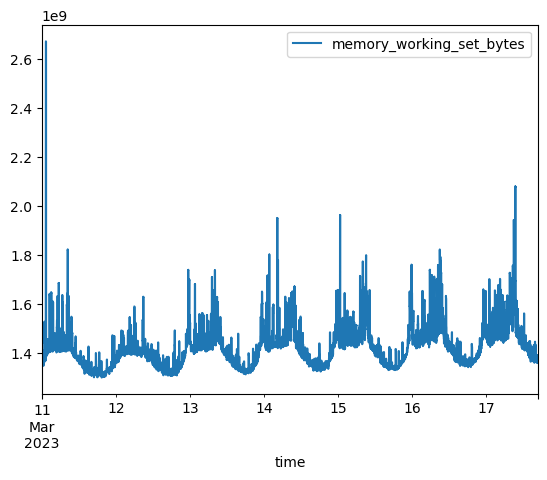

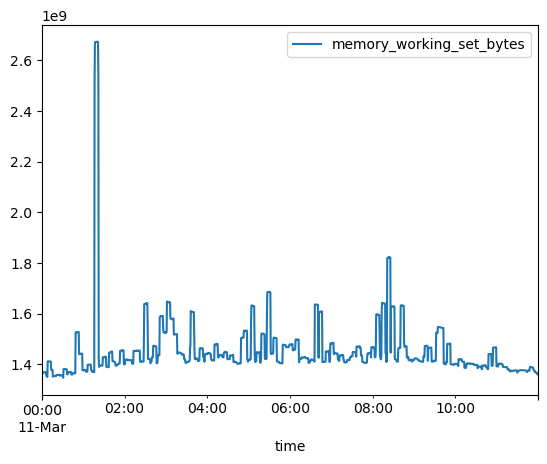

In [266]:
plot_cols = ['memory_working_set_bytes']
plot_features = data[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = data[plot_cols][:1440]
plot_features.index = date_time[:1440]
_ = plot_features.plot(subplots=True)

In [269]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
MAX_EPOCHS = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=2,
                                                mode='min')

lstm_model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.MeanAbsoluteError()])

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint_v3.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history = lstm_model.fit(X_train_tensors_f, y_train, epochs=MAX_EPOCHS,
                    callbacks=[early_stopping, checkpoint])


Epoch 1/1000
469/469 [==============================] - 1s 668us/step - loss: 0.0025 - mean_absolute_error: 0.0293
Epoch 2/1000
469/469 [==============================] - 0s 671us/step - loss: 0.0023 - mean_absolute_error: 0.0280
Epoch 3/1000
469/469 [==============================] - 0s 794us/step - loss: 0.0023 - mean_absolute_error: 0.0281
Epoch 4/1000
469/469 [==============================] - 0s 640us/step - loss: 0.0023 - mean_absolute_error: 0.0281
Epoch 5/1000
469/469 [==============================] - 0s 637us/step - loss: 0.0023 - mean_absolute_error: 0.0280
Epoch 6/1000
469/469 [==============================] - 0s 636us/step - loss: 0.0023 - mean_absolute_error: 0.0279
Epoch 7/1000
469/469 [==============================] - 0s 650us/step - loss: 0.0023 - mean_absolute_error: 0.0280
Epoch 8/1000
469/469 [==============================] - 0s 639us/step - loss: 0.0023 - mean_absolute_error: 0.0280
Epoch 9/1000
469/469 [==============================] - 0s 639us/step - loss: 0.

In [270]:
performance = {}

In [272]:
performance['lstm_model'] = lstm_model.evaluate(X_test_tensors_f, y_test, verbose=0)

In [274]:
df_x_ss = ss.transform(data.loc[:,['cpu_usage_nanocores']]) 
df_y_ms = ms.transform(data.loc[:,['memory_working_set_bytes']]) 
df_x_ss = tf.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

In [288]:
data = data.loc[:,['cpu_usage_nanocores', 'memory_working_set_bytes']]
X = data.loc[:,['cpu_usage_nanocores']]
Y = data.loc[:,['memory_working_set_bytes']]

In [289]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y) 

X_train = X_ss[:15000, :]
X_test = X_ss[15000:, :]

y_train = y_ms[:15000, :]
y_test = y_ms[15000:, :] 


print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (15000, 1) (15000, 1)
Testing Shape (4304, 1) (4304, 1)


In [290]:

X_train_tensors_f = tf.reshape(X_train,   (X_train.shape[0], 1, X_train.shape[1]))
X_test_tensors_f = tf.reshape(X_test,  (X_test.shape[0], 1, X_test.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test.shape) 

Training Shape (15000, 1, 1) (15000, 1)
Testing Shape (4304, 1, 1) (4304, 1)


In [291]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=False, activation="relu"),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [309]:
train_predict = lstm_model(df_x_ss)
train_predict.shape

TensorShape([19304, 1])

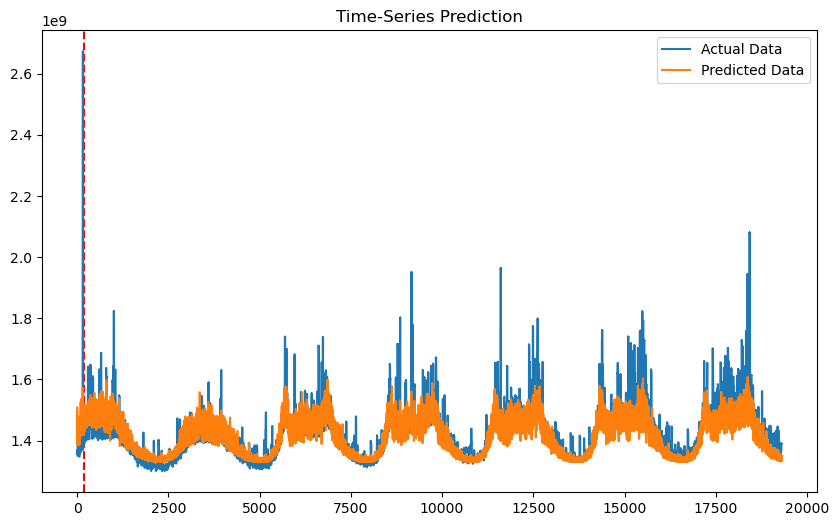

In [277]:
train_predict = lstm_model(df_x_ss)
predicted = train_predict
label_y = df_y_ms

predicted= ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [286]:
data = pd.read_csv('cpu_memory_usage_v1.csv', header=0)
data

,name,tags,time,pod_name,namespace,cpu_usage_nanocores,memory_working_set_bytes
0,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-wklkm,drive,96624523,1337585664
1,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-lpr67,drive,89770983,1361653760
2,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-sgr2x,drive,77112631,1285890048
3,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-2wdsh,drive,35692946,1254232064
4,kubernetes_pod_container,NaN,1678492800000000000,drive-az2-prd-69cbb999bc-chm2j,drive,93409866,1294434304
...,...,...,...,...,...,...,...
231630,kubernetes_pod_container,NaN,1679071890000000000,drive-az2-prd-69cbb999bc-wklkm,drive,12293800,1313955840
231631,kubernetes_pod_container,NaN,1679071890000000000,drive-az2-prd-69cbb999bc-sgr2x,drive,9217571,1338773504
231632,kubernetes_pod_container,NaN,1679071890000000000,drive-az2-prd-69cbb999bc-h8hqh,drive,13224852,1415725056
231633,kubernetes_pod_container,NaN,1679071890000000000,drive-az2-prd-69cbb999bc-b8k2z,drive,18092365,1453850624


In [287]:
data['time'] = pd.to_datetime(data['time'], unit='ns')
data = data.loc[data.pod_name == 'drive-az2-prd-69cbb999bc-lpr67']
date_time = pd.to_datetime(data['time'], format='%Y-%M-%D %H:%M:%S')

In [282]:
df_x_ss = ss.transform(data.loc[:,['cpu_usage_nanocores']]) 
df_y_ms = ms.transform(data.loc[:,['memory_working_set_bytes']]) 
df_x_ss = tf.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1])) 

In [296]:

X_train_tensors_f = tf.reshape(X_train,   (X_train.shape[0], 1, X_train.shape[1]))
X_test_tensors_f = tf.reshape(X_test,  (X_test.shape[0], 1, X_test.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test.shape) 

Training Shape (15000, 1, 1) (15000, 1)
Testing Shape (4304, 1, 1) (4304, 1)


In [311]:
gru_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(32, return_sequences=False),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [312]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
MAX_EPOCHS = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=2,
                                                mode='min')

gru_model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.MeanAbsoluteError()])

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint_v3.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history = gru_model.fit(X_train_tensors_f, y_train, epochs=MAX_EPOCHS,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/1000
469/469 [==============================] - 2s 763us/step - loss: 0.0026 - mean_absolute_error: 0.0301
Epoch 2/1000
469/469 [==============================] - 0s 715us/step - loss: 0.0023 - mean_absolute_error: 0.0280
Epoch 3/1000
469/469 [==============================] - 0s 710us/step - loss: 0.0023 - mean_absolute_error: 0.0281
Epoch 4/1000
469/469 [==============================] - 0s 692us/step - loss: 0.0023 - mean_absolute_error: 0.0282
Epoch 5/1000
469/469 [==============================] - 0s 694us/step - loss: 0.0023 - mean_absolute_error: 0.0281
Epoch 6/1000
469/469 [==============================] - 0s 686us/step - loss: 0.0023 - mean_absolute_error: 0.0282
Epoch 7/1000
469/469 [==============================] - 0s 688us/step - loss: 0.0023 - mean_absolute_error: 0.0280
Epoch 8/1000
469/469 [==============================] - 0s 705us/step - loss: 0.0023 - mean_absolute_error: 0.0281
Epoch 9/1000
469/469 [==============================] - 0s 684us/step - loss: 0.

In [313]:
performance['gru_model'] = gru_model.evaluate(X_test_tensors_f, y_test, verbose=0)

In [314]:
train_predict = gru_model(df_x_ss)
train_predict.shape

TensorShape([19304, 1])

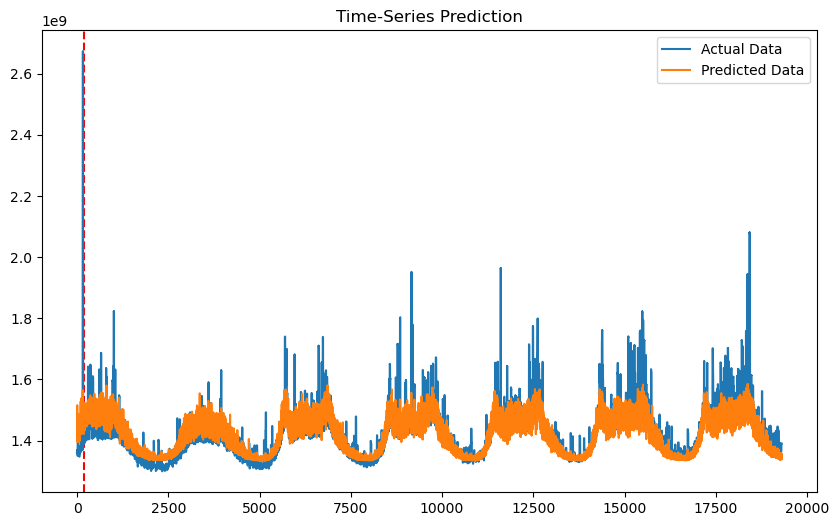

In [315]:
train_predict = gru_model(df_x_ss)
predicted = train_predict
label_y = df_y_ms

predicted= ms.inverse_transform(predicted) 
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--') 

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [317]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

lstm_model  : 0.0423
gru_model   : 0.0395
